# Mapping GO IDs to GO Slim Terms

This code utilizes pipelines from the [paper-gonad-meth repo](https://github.com/epigeneticstoocean/paper-gonad-meth/tree/master) and [bioinformatics pipeline](https://robertslab.github.io/resources/bio-Annotation/#map-go-ids-to-goslims), both out of the Roberts Lab.

In [2]:
# loading packages
library(tidyverse)
library(dplyr)
library(GSEABase)
library(GO.db)

input file includes column of gene ID and column of Gene Ontology (GO) ID, separated by semi-colon

Gene Onology file for *Crassostrea virginica* obtained from [NCBI](https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/022/765/GCF_002022765.2_C_virginica-3.0/)

In [26]:
# Read the GAF file into R
GOobo <- read.table('/project/pi_sarah_gignouxwolfsohn_uml_edu/Reference_genomes/Cvirginica_genome/GCF_002022765.2_C_virginica-3.0_gene_ontology.gaf', 
                          sep = "\t", 
                          header = FALSE, 
                          comment.char = "!", 
                          stringsAsFactors = FALSE)

# assign column names
colnames(GOobo) <- c('DB', 'GeneID', 'gene_id', 'Qualifier', 'Gene.Ontology.IDs', 'Reference', 'Evidence_Code', 'With,From', 'Aspect', 'Gene_Name', 'Gene_Synonym', 'Type', 'Taxon', 'Date', 'Assigned_By')

# selecting only the LOC number and GO ID columns
gene2GO <- GOobo[,c(3,5)]

# Aggregate GO IDs for each gene symbol
gene2GO <- aggregate(Gene.Ontology.IDs ~ gene_id, data = gene2GO, function(x) paste(unique(x), collapse = "; "))

# preview df
head(gene2GO)


,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111099029,GO:0005261; GO:0098655
2,LOC111099032,GO:0004930; GO:0005886; GO:0007186
3,LOC111099033,GO:0016020; GO:0022857; GO:0055085
4,LOC111099034,GO:0005515
5,LOC111099036,GO:0008028; GO:0015718; GO:0055085
6,LOC111099039,GO:0004930; GO:0005886; GO:0007189


In [27]:
write.csv(gene2GO, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/DMGs_analysis/gene2GO.csv', row.names=FALSE)

In [30]:
head(read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/DMGs_analysis/gene2GO.csv'))

,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111099029,GO:0005261; GO:0098655
2,LOC111099032,GO:0004930; GO:0005886; GO:0007186
3,LOC111099033,GO:0016020; GO:0022857; GO:0055085
4,LOC111099034,GO:0005515
5,LOC111099036,GO:0008028; GO:0015718; GO:0055085
6,LOC111099039,GO:0004930; GO:0005886; GO:0007189


### [Roberts Lab Bioinformatic Annotation Pipeline](https://robertslab.github.io/resources/bio-Annotation/#map-go-ids-to-goslims)

In [3]:
# copied from workflow pipeline linked above

# set variables

# Column names corresponding to gene name/ID and GO IDs
GO.ID.column <- "Gene.Ontology.IDs"
gene.ID.column <- "gene_id"

# Relative path or URL to input file
input.file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/DMGs_analysis/gene2GO.csv"


##### Official GO info - no need to change #####
goslims_obo <- "goslim_generic.obo"
goslims_url <- "http://current.geneontology.org/ontology/subsets/goslim_generic.obo"


In [4]:
# copied from workflow pipeline linked above

# download generic goslim-obo

# Find GSEAbase installation location
gseabase_location <- find.package("GSEABase")

# Load path to GOslim OBO file
goslim_obo_destintation <- file.path(gseabase_location, "extdata", goslims_obo, fsep = "/")

# Download the GOslim OBO file
download.file(url = goslims_url, destfile = goslim_obo_destintation)

# Loads package files
gseabase_files <- system.file("extdata", goslims_obo, package="GSEABase")

one unique gene per row, multiple GO IDs per gene

In [5]:
# copied from workflow pipeline linked above

# read in gene file

full.gene.df <- read.csv(file = input.file, header = TRUE)

str(full.gene.df)
head(full.gene.df)

'data.frame':	22614 obs. of  2 variables:
 $ gene_id          : chr  "LOC111099029" "LOC111099032" "LOC111099033" "LOC111099034" ...
 $ Gene.Ontology.IDs: chr  "GO:0005261; GO:0098655" "GO:0004930; GO:0005886; GO:0007186" "GO:0016020; GO:0022857; GO:0055085" "GO:0005515" ...


,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111099029,GO:0005261; GO:0098655
2,LOC111099032,GO:0004930; GO:0005886; GO:0007186
3,LOC111099033,GO:0016020; GO:0022857; GO:0055085
4,LOC111099034,GO:0005515
5,LOC111099036,GO:0008028; GO:0015718; GO:0055085
6,LOC111099039,GO:0004930; GO:0005886; GO:0007189


In [7]:
# copied from workflow pipeline linked above

# remove NA and uniprotIDs

# Clean whitespace, filter NA/empty rows, select columns, and split GO terms using column name variables
library(dplyr) # for some reason I'm having conflicts with select()
gene.GO.df <- full.gene.df %>%
  mutate(!!GO.ID.column := str_replace_all(.data[[GO.ID.column]], "\\s*;\\s*", ";")) %>%
  filter(!is.na(.data[[gene.ID.column]]) & !is.na(.data[[GO.ID.column]]) & .data[[GO.ID.column]] != "") %>%
  dplyr::select(all_of(c(gene.ID.column, GO.ID.column)))

head(gene.GO.df)

,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111099029,GO:0005261;GO:0098655
2,LOC111099032,GO:0004930;GO:0005886;GO:0007186
3,LOC111099033,GO:0016020;GO:0022857;GO:0055085
4,LOC111099034,GO:0005515
5,LOC111099036,GO:0008028;GO:0015718;GO:0055085
6,LOC111099039,GO:0004930;GO:0005886;GO:0007189


flatten df so only one gene and one GO ID per row

In [8]:
# copied from workflow pipeline linked above

# flatten gene and GO IDs

flat.gene.GO.df <- gene.GO.df %>% separate_rows(!!sym(GO.ID.column), sep = ";")

str(flat.gene.GO.df)
head(flat.gene.GO.df)

tibble [77,015 × 2] (S3: tbl_df/tbl/data.frame)
 $ gene_id          : chr [1:77015] "LOC111099029" "LOC111099029" "LOC111099032" "LOC111099032" ...
 $ Gene.Ontology.IDs: chr [1:77015] "GO:0005261" "GO:0098655" "GO:0004930" "GO:0005886" ...


gene_id,Gene.Ontology.IDs
<chr>,<chr>
LOC111099029,GO:0005261
LOC111099029,GO:0098655
LOC111099032,GO:0004930
LOC111099032,GO:0005886
LOC111099032,GO:0007186
LOC111099033,GO:0016020


Grouping by GO ID - one unique GO ID per row, multiple genes per GO ID

In [9]:
# copied from workflow pipeline linked above

# group by GO

grouped.gene.GO.df <- flat.gene.GO.df %>%
  group_by(!!sym(GO.ID.column)) %>%
  summarise(!!gene.ID.column := paste(.data[[gene.ID.column]], collapse = ","))

str(grouped.gene.GO.df)
head(grouped.gene.GO.df)

tibble [5,357 × 2] (S3: tbl_df/tbl/data.frame)
 $ Gene.Ontology.IDs: chr [1:5357] "GO:0000002" "GO:0000003" "GO:0000009" "GO:0000012" ...
 $ gene_id          : chr [1:5357] "LOC111135903" "LOC111115224" "LOC111099485,LOC111099578,LOC111108038,LOC111119818" "LOC111111498,LOC111111868,LOC111128425,LOC111128516,LOC111135198,LOC111135354,LOC111136704" ...


Gene.Ontology.IDs,gene_id
<chr>,<chr>
GO:0000002,LOC111135903
GO:0000003,LOC111115224
GO:0000009,"LOC111099485,LOC111099578,LOC111108038,LOC111119818"
GO:0000012,"LOC111111498,LOC111111868,LOC111128425,LOC111128516,LOC111135198,LOC111135354,LOC111136704"
GO:0000014,"LOC111111711,LOC111111845,LOC111121059,LOC111126118"
GO:0000015,"LOC111132341,LOC111137133"


#### Mapping GO IDs to GO Slim

In [10]:
# copied from workflow pipeline linked above

# Vectorize GO IDs
go_ids <- grouped.gene.GO.df[[GO.ID.column]]

str(go_ids)
head(go_ids)

 chr [1:5357] "GO:0000002" "GO:0000003" "GO:0000009" "GO:0000012" ...


[1] "GO:0000002" "GO:0000003" "GO:0000009" "GO:0000012" "GO:0000014"
[6] "GO:0000015"

In [11]:
# copied from workflow pipeline linked above

# extract GOslims from OBO

# Create GSEAbase GOCollection using `go_ids`
myCollection <- GOCollection(go_ids)

# Retrieve GOslims from GO OBO file set
slim <- getOBOCollection(gseabase_files)

str(slim)

Formal class 'OBOCollection' [package "GSEABase"] with 7 slots
  ..@ .stanza     :'data.frame':	153 obs. of  1 variable:
  .. ..$ value: chr [1:153] "Root" "Term" "Term" "Term" ...
  ..@ .subset     :'data.frame':	22 obs. of  1 variable:
  .. ..$ value: chr [1:22] "Rhea list of ChEBI terms representing the major species at pH 7.3." "Term not to be used for direct annotation" "Terms planned for obsoletion" "AGR slim" ...
  ..@ .kv         :'data.frame':	2075 obs. of  3 variables:
  .. ..$ stanza_id: chr [1:2075] ".__Root__" ".__Root__" ".__Root__" ".__Root__" ...
  .. ..$ key      : chr [1:2075] "format-version" "data-version" "synonymtypedef" "synonymtypedef" ...
  .. ..$ value    : chr [1:2075] "1.2" "go/2024-11-03/subsets/goslim_generic.owl" "syngo_official_label \"label approved by the SynGO project\"" "systematic_synonym \"Systematic synonym\" EXACT" ...
  ..@ evidenceCode: chr [1:26] "EXP" "IDA" "IPI" "IMP" ...
  ..@ ontology    : chr NA
  ..@ ids         : chr [1:141] "GO:0000228

In [12]:
# copied from workflow pipeline linked above

# retrieve BP GOslims

# Retrieve Biological Process (BP) GOslims
slimdf <- goSlim(myCollection, slim, "BP", verbose)
str(slimdf)
head(slimdf)

'data.frame':	72 obs. of  3 variables:
 $ Count  : int  54 11 9 32 4 3 0 0 44 33 ...
 $ Percent: num  2.127 0.433 0.354 1.26 0.158 ...
 $ Term   : chr  "mitotic cell cycle" "cytokinesis" "cytoplasmic translation" "immune system process" ...


,Count,Percent,Term
,<int>,<dbl>,<chr>
GO:0000278,54,2.1268216,mitotic cell cycle
GO:0000910,11,0.4332414,cytokinesis
GO:0002181,9,0.3544703,cytoplasmic translation
GO:0002376,32,1.2603387,immune system process
GO:0003012,4,0.1575423,muscle system process
GO:0003013,3,0.1181568,circulatory system process


In [14]:
dim(slimdf) # 72 total GOslim terms

[1] 72  3

so now have df with GOslim term and GO ID

In [15]:
# copied from workflow pipeline linked above

#Map GO to GOslims

# List of GOslims and all GO IDs from `go_ids`
gomap <- as.list(GOBPOFFSPRING[rownames(slimdf)])

# Maps `go_ids` to matching GOslims
mapped <- lapply(gomap, intersect, ids(myCollection))

# Append all mapped GO IDs to `slimdf`
# `sapply` needed to apply paste() to create semi-colon delimited values
slimdf$GO.IDs <- sapply(lapply(gomap, intersect, ids(myCollection)), paste, collapse=";")

# Remove "character(0) string from "GO.IDs" column
slimdf$GO.IDs[slimdf$GO.IDs == "character(0)"] <- ""

# Add self-matching GOIDs to "GO.IDs" column, if not present
for (go_id in go_ids) {
  # Check if the go_id is present in the row names
  if (go_id %in% rownames(slimdf)) {
    # Check if the go_id is not present in the GO.IDs column
    # Also removes white space "trimws()" and converts all to upper case to handle
    # any weird, "invisible" formatting issues.
    if (!go_id %in% trimws(toupper(strsplit(slimdf[go_id, "GO.IDs"], ";")[[1]]))) {
      # Append the go_id to the GO.IDs column with a semi-colon separator
      if (length(slimdf$GO.IDs) > 0 && nchar(slimdf$GO.IDs[nrow(slimdf)]) > 0) {
        slimdf[go_id, "GO.IDs"] <- paste0(slimdf[go_id, "GO.IDs"], "; ", go_id)
      } else {
        slimdf[go_id, "GO.IDs"] <- go_id
      }
    }
  }
}

str(slimdf)
head(slimdf)

'data.frame':	72 obs. of  4 variables:
 $ Count  : int  54 11 9 32 4 3 0 0 44 33 ...
 $ Percent: num  2.127 0.433 0.354 1.26 0.158 ...
 $ Term   : chr  "mitotic cell cycle" "cytokinesis" "cytoplasmic translation" "immune system process" ...
 $ GO.IDs : chr  "GO:0000070;GO:0000082;GO:0000083;GO:0000086;GO:0000132;GO:0000281;GO:0007052;GO:0007076;GO:0007080;GO:0007088;G"| __truncated__ "GO:0000281;GO:0000915;GO:0032465;GO:0032467;GO:0036089;GO:0040038;GO:0061640;GO:0061952;GO:1902410;GO:1902412;GO:2000431" "GO:0001731;GO:0001732;GO:0002182;GO:0002183;GO:0002184;GO:0002188;GO:2000766;GO:2000767; GO:0002181" "GO:0001782;GO:0002218;GO:0002224;GO:0002250;GO:0002495;GO:0002682;GO:0002755;GO:0006955;GO:0006956;GO:0006959;G"| __truncated__ ...


,Count,Percent,Term,GO.IDs
,<int>,<dbl>,<chr>,<chr>
GO:0000278,54,2.1268216,mitotic cell cycle,GO:0000070;GO:0000082;GO:0000083;GO:0000086;GO:0000132;GO:0000281;GO:0007052;GO:0007076;GO:0007080;GO:0007088;GO:0007089;GO:0007091;GO:0007093;GO:0007094;GO:0007095;GO:0007096;GO:0007100;GO:0007346;GO:0010389;GO:0010971;GO:0010972;GO:0031573;GO:0033314;GO:0034087;GO:0040001;GO:0044772;GO:0044773;GO:0045840;GO:0045842;GO:0045930;GO:0051228;GO:0051256;GO:0051306;GO:0051315;GO:0060236;GO:0061780;GO:0061952;GO:0090266;GO:0090307;GO:1900087;GO:1901673;GO:1902410;GO:1902412;GO:1902969;GO:1902975;GO:1902977;GO:1902979;GO:1902983;GO:1903461;GO:1990426;GO:1990810;GO:2000045;GO:2000134; GO:0000278
GO:0000910,11,0.4332414,cytokinesis,GO:0000281;GO:0000915;GO:0032465;GO:0032467;GO:0036089;GO:0040038;GO:0061640;GO:0061952;GO:1902410;GO:1902412;GO:2000431
GO:0002181,9,0.3544703,cytoplasmic translation,GO:0001731;GO:0001732;GO:0002182;GO:0002183;GO:0002184;GO:0002188;GO:2000766;GO:2000767; GO:0002181
GO:0002376,32,1.2603387,immune system process,GO:0001782;GO:0002218;GO:0002224;GO:0002250;GO:0002495;GO:0002682;GO:0002755;GO:0006955;GO:0006956;GO:0006959;GO:0019731;GO:0030888;GO:0030890;GO:0031295;GO:0033151;GO:0034128;GO:0034164;GO:0039536;GO:0042102;GO:0042130;GO:0043029;GO:0045087;GO:0045088;GO:0045089;GO:0045579;GO:0046651;GO:0048821;GO:0050852;GO:0050901;GO:0051251;GO:0060335; GO:0002376
GO:0003012,4,0.1575423,muscle system process,GO:0003009;GO:0006936;GO:0006937;GO:0055117
GO:0003013,3,0.1181568,circulatory system process,GO:0003085;GO:0055117;GO:0060047


now have df with GOslim ID as the rowname and the corresponding GO IDs that fall within the GOslim term listed

flatten GOslims file - one GO ID and one GOslim term per row

In [17]:
# copied from workflow pipeline linked above

# flatten-GOslims-file

# "Flatten" file so each row is single GO ID with corresponding GOslim
# rownames_to_column needed to retain row name info
slimdf_separated <- as.data.frame(slimdf %>%
  rownames_to_column('GOslim') %>%
  separate_rows(GO.IDs, sep = ";"))

# Group by unique GO ID
grouped_slimdf <- slimdf_separated %>%
  filter(!is.na(GO.IDs) & GO.IDs != "") %>%
  group_by(GO.IDs) %>%
  summarize(GOslim = paste(GOslim, collapse = ";"),
            Term = paste(Term, collapse = ";"))


str(grouped_slimdf)
head(grouped_slimdf)

tibble [1,850 × 3] (S3: tbl_df/tbl/data.frame)
 $ GO.IDs: chr [1:1850] " GO:0000278" " GO:0002181" " GO:0002376" " GO:0005975" ...
 $ GOslim: chr [1:1850] "GO:0000278" "GO:0002181" "GO:0002376" "GO:0005975" ...
 $ Term  : chr [1:1850] "mitotic cell cycle" "cytoplasmic translation" "immune system process" "carbohydrate metabolic process" ...


GO.IDs,GOslim,Term
<chr>,<chr>,<chr>
GO:0000278,GO:0000278,mitotic cell cycle
GO:0002181,GO:0002181,cytoplasmic translation
GO:0002376,GO:0002376,immune system process
GO:0005975,GO:0005975,carbohydrate metabolic process
GO:0006091,GO:0006091,generation of precursor metabolites and energy
GO:0006260,GO:0006260,DNA replication


In [65]:
# copied from workflow pipeline linked above

# sort and select slimdf counts

slimdf.sorted <- slimdf %>% arrange(desc(Count))

slim.count.df <- slimdf.sorted[,c(3,1)]
 # select(Term, Count)

str(slim.count.df)

head(slim.count.df)

'data.frame':	72 obs. of  2 variables:
 $ Term : chr  "signaling" "carbohydrate derivative metabolic process" "lipid metabolic process" "anatomical structure development" ...
 $ Count: int  232 151 133 126 119 98 96 94 78 77 ...


,Term,Count
,<chr>,<int>
GO:0023052,signaling,232
GO:1901135,carbohydrate derivative metabolic process,151
GO:0006629,lipid metabolic process,133
GO:0048856,anatomical structure development,126
GO:0055086,nucleobase-containing small molecule metabolic process,119
GO:0006520,amino acid metabolic process,98


here, count means out of the whole genome/GOslim file, the number of GO IDs that fall into that GOslim term


In [88]:
head(grouped_slimdf)
head(flat.gene.GO.df)

GO.IDs,GOslim,Term
<chr>,<chr>,<chr>
GO:0000278,GO:0000278,mitotic cell cycle
GO:0002181,GO:0002181,cytoplasmic translation
GO:0002376,GO:0002376,immune system process
GO:0005975,GO:0005975,carbohydrate metabolic process
GO:0006091,GO:0006091,generation of precursor metabolites and energy
GO:0006260,GO:0006260,DNA replication


gene_id,Gene.Ontology.IDs
<chr>,<chr>
LOC111099029,GO:0005261
LOC111099029,GO:0098655
LOC111099032,GO:0004930
LOC111099032,GO:0005886
LOC111099032,GO:0007186
LOC111099033,GO:0016020



so have two flat dfs - one that has one gene and one GO ID per row, and one with one GO ID and one GOslim term per row - want to merge them to get a new flat df with one gene and one GOslim term per row

In [66]:
# change column name to same as grouped_slimdf
colnames(flat.gene.GO.df) <- c('gene_id', 'GO.IDs')

gene2GOslim <- merge(grouped_slimdf, flat.gene.GO.df, by = 'GO.IDs')
head(gene2GOslim)

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
1,GO:0000012,GO:0006281,DNA repair,LOC111111868
2,GO:0000012,GO:0006281,DNA repair,LOC111128425
3,GO:0000012,GO:0006281,DNA repair,LOC111135198
4,GO:0000012,GO:0006281,DNA repair,LOC111111498
5,GO:0000012,GO:0006281,DNA repair,LOC111128516
6,GO:0000012,GO:0006281,DNA repair,LOC111136704


The code above just used `goSlim()` on a provided set of GO IDs - the ones I provided were the entire set of genes in *C. virginica* - I think, according to this [Bioconductor forum response](https://support.bioconductor.org/p/128407/#128408), I can provide my list of genes and GO IDs from the pairwise comparison and run `goSlim()`(/all of the code above?) and it will spit out counts and percentage for me? 

I guess my question becomes:
- I ran GO-MWU on *all* of my genes, not just the ones that were significant, using log2FC as my measure of significance - that would be my input for this?
- I shouldn't take my list of significant DMG and just match it to the GO term and GOslim term? 



following protocol from [paper-gonad-meth repo](https://github.com/epigeneticstoocean/paper-gonad-meth/tree/master), fitting [this pipeline](https://github.com/epigeneticstoocean/paper-gonad-meth/blob/master/code/14-Gene-Enrichment-with-GO-MWU.Rmd) to my GOSlim and GO-MWU files

all GO-MWU files were created from [GO-MWU.R](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/DMGs_analysis/go_mwu/GO_MWU.R) - all **biological process** and using log2FoldChange as measure of significance


starting with:

## CH vs. HC


In [22]:
goMWU_ch <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/DMGs_analysis/go_mwu/BP_allGenes_CH_lfc.csv', sep = '\t')

# change column name for gene to be the same in gene2GOslim
colnames(goMWU_ch) <- c('name', 'Gene.Ontology.IDs', 'lev', 'gene_id', 'value')

# only need gene_id and GO ID for input
goMWU_ch <- goMWU_ch[,c(4,2)]

head(goMWU_ch)

,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111101101,GO:0007015;GO:0097435
2,LOC111108074,GO:0007015;GO:0097435
3,LOC111109780,GO:0007015;GO:0097435
4,LOC111113129,GO:0007015;GO:0097435
5,LOC111113355,GO:0007015;GO:0097435
6,LOC111115662,GO:0007015;GO:0097435


In [32]:
write.csv(goMWU_ch, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/go-mwu/goMWU_ch.csv', row.names = FALSE)

In [33]:
# copied from workflow pipeline linked above

# set variables

# Column names corresponding to gene name/ID and GO IDs
GO.ID.column <- "Gene.Ontology.IDs"
gene.ID.column <- "gene_id"

# Relative path or URL to input file
input.file <- '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/go-mwu/goMWU_ch.csv'


##### Official GO info - no need to change #####
goslims_obo <- "goslim_generic.obo"
goslims_url <- "http://current.geneontology.org/ontology/subsets/goslim_generic.obo"


In [34]:
# copied from workflow pipeline linked above

# download generic goslim-obo

# Find GSEAbase installation location
gseabase_location <- find.package("GSEABase")

# Load path to GOslim OBO file
goslim_obo_destintation <- file.path(gseabase_location, "extdata", goslims_obo, fsep = "/")

# Download the GOslim OBO file
download.file(url = goslims_url, destfile = goslim_obo_destintation)

# Loads package files
gseabase_files <- system.file("extdata", goslims_obo, package="GSEABase")

one unique gene per row, multiple GO IDs per gene

In [35]:
# copied from workflow pipeline linked above

# read in gene file

full.gene.df <- read.csv(file = input.file, header = TRUE)

str(full.gene.df)
head(full.gene.df)

'data.frame':	6755 obs. of  2 variables:
 $ gene_id          : chr  "LOC111101101" "LOC111108074" "LOC111109780" "LOC111113129" ...
 $ Gene.Ontology.IDs: chr  "GO:0007015;GO:0097435" "GO:0007015;GO:0097435" "GO:0007015;GO:0097435" "GO:0007015;GO:0097435" ...


,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111101101,GO:0007015;GO:0097435
2,LOC111108074,GO:0007015;GO:0097435
3,LOC111109780,GO:0007015;GO:0097435
4,LOC111113129,GO:0007015;GO:0097435
5,LOC111113355,GO:0007015;GO:0097435
6,LOC111115662,GO:0007015;GO:0097435


In [36]:
# copied from workflow pipeline linked above

# remove NA and uniprotIDs

# Clean whitespace, filter NA/empty rows, select columns, and split GO terms using column name variables
library(dplyr) # for some reason I'm having conflicts with select()
gene.GO.df <- full.gene.df %>%
  mutate(!!GO.ID.column := str_replace_all(.data[[GO.ID.column]], "\\s*;\\s*", ";")) %>%
  filter(!is.na(.data[[gene.ID.column]]) & !is.na(.data[[GO.ID.column]]) & .data[[GO.ID.column]] != "") %>%
  dplyr::select(all_of(c(gene.ID.column, GO.ID.column)))

head(gene.GO.df)

,gene_id,Gene.Ontology.IDs
,<chr>,<chr>
1,LOC111101101,GO:0007015;GO:0097435
2,LOC111108074,GO:0007015;GO:0097435
3,LOC111109780,GO:0007015;GO:0097435
4,LOC111113129,GO:0007015;GO:0097435
5,LOC111113355,GO:0007015;GO:0097435
6,LOC111115662,GO:0007015;GO:0097435


flatten df so only one gene and one GO ID per row

In [37]:
# copied from workflow pipeline linked above

# flatten gene and GO IDs

flat.gene.GO.df <- gene.GO.df %>% separate_rows(!!sym(GO.ID.column), sep = ";")

str(flat.gene.GO.df)
head(flat.gene.GO.df)

tibble [16,653 × 2] (S3: tbl_df/tbl/data.frame)
 $ gene_id          : chr [1:16653] "LOC111101101" "LOC111101101" "LOC111108074" "LOC111108074" ...
 $ Gene.Ontology.IDs: chr [1:16653] "GO:0007015" "GO:0097435" "GO:0007015" "GO:0097435" ...


gene_id,Gene.Ontology.IDs
<chr>,<chr>
LOC111101101,GO:0007015
LOC111101101,GO:0097435
LOC111108074,GO:0007015
LOC111108074,GO:0097435
LOC111109780,GO:0007015
LOC111109780,GO:0097435


Grouping by GO ID - one unique GO ID per row, multiple genes per GO ID

In [38]:
# copied from workflow pipeline linked above

# group by GO

grouped.gene.GO.df <- flat.gene.GO.df %>%
  group_by(!!sym(GO.ID.column)) %>%
  summarise(!!gene.ID.column := paste(.data[[gene.ID.column]], collapse = ","))

str(grouped.gene.GO.df)
head(grouped.gene.GO.df)

tibble [496 × 2] (S3: tbl_df/tbl/data.frame)
 $ Gene.Ontology.IDs: chr [1:496] "GO:0000012" "GO:0000027" "GO:0000028" "GO:0000045" ...
 $ gene_id          : chr [1:496] "LOC111111498,LOC111111868,LOC111128425,LOC111128516,LOC111135198,LOC111136704" "LOC111103620,LOC111109112,LOC111116477,LOC111118739,LOC111119745,LOC111119970,LOC111120109,LOC111120886,LOC1111"| __truncated__ "LOC111112561,LOC111118540,LOC111120557,LOC111121432,LOC111123620,LOC111125548,LOC111126883,LOC111127769,LOC1111"| __truncated__ "LOC111099721,LOC111099934,LOC111100289,LOC111100878,LOC111101815,LOC111102871,LOC111106048,LOC111108144,LOC1111"| __truncated__ ...


Gene.Ontology.IDs,gene_id
<chr>,<chr>
GO:0000012,"LOC111111498,LOC111111868,LOC111128425,LOC111128516,LOC111135198,LOC111136704"
GO:0000027,"LOC111103620,LOC111109112,LOC111116477,LOC111118739,LOC111119745,LOC111119970,LOC111120109,LOC111120886,LOC111120892,LOC111120994,LOC111121522,LOC111121958,LOC111129891,LOC111130039,LOC111132903,LOC111135538,LOC111136247,LOC111137006"
GO:0000028,"LOC111112561,LOC111118540,LOC111120557,LOC111121432,LOC111123620,LOC111125548,LOC111126883,LOC111127769,LOC111128580,LOC111135312"
GO:0000045,"LOC111099721,LOC111099934,LOC111100289,LOC111100878,LOC111101815,LOC111102871,LOC111106048,LOC111108144,LOC111111295,LOC111111995,LOC111118945,LOC111120809,LOC111122717,LOC111123325,LOC111124607,LOC111124610,LOC111125798,LOC111127040,LOC111127325,LOC111127879,LOC111127926,LOC111128047,LOC111128059,LOC111129370,LOC111131691,LOC111131738,LOC111132058,LOC111132962,LOC111133363,LOC111134873,LOC111136300,LOC111137152,LOC111110828,LOC111112253,LOC111123221,LOC111124399,LOC111126629,LOC111133574,LOC111133575,LOC111135792,LOC111136338,LOC111137481"
GO:0000054,"LOC111106509,LOC111119150,LOC111119639,LOC111122535,LOC111125104,LOC111125671,LOC111129825,LOC111130459,LOC111133705,LOC111135936,LOC111136254,LOC111136517"
GO:0000055,"LOC111106509,LOC111119150,LOC111122535,LOC111129825,LOC111130459,LOC111135936"


#### Mapping GO IDs to GO Slim

In [39]:
# copied from workflow pipeline linked above

# Vectorize GO IDs
go_ids <- grouped.gene.GO.df[[GO.ID.column]]

str(go_ids)
head(go_ids)

 chr [1:496] "GO:0000012" "GO:0000027" "GO:0000028" "GO:0000045" ...


[1] "GO:0000012" "GO:0000027" "GO:0000028" "GO:0000045" "GO:0000054"
[6] "GO:0000055"

In [40]:
# copied from workflow pipeline linked above

# extract GOslims from OBO

# Create GSEAbase GOCollection using `go_ids`
myCollection <- GOCollection(go_ids)

# Retrieve GOslims from GO OBO file set
slim <- getOBOCollection(gseabase_files)

str(slim)

Formal class 'OBOCollection' [package "GSEABase"] with 7 slots
  ..@ .stanza     :'data.frame':	153 obs. of  1 variable:
  .. ..$ value: chr [1:153] "Root" "Term" "Term" "Term" ...
  ..@ .subset     :'data.frame':	22 obs. of  1 variable:
  .. ..$ value: chr [1:22] "Rhea list of ChEBI terms representing the major species at pH 7.3." "Term not to be used for direct annotation" "Terms planned for obsoletion" "AGR slim" ...
  ..@ .kv         :'data.frame':	2075 obs. of  3 variables:
  .. ..$ stanza_id: chr [1:2075] ".__Root__" ".__Root__" ".__Root__" ".__Root__" ...
  .. ..$ key      : chr [1:2075] "format-version" "data-version" "synonymtypedef" "synonymtypedef" ...
  .. ..$ value    : chr [1:2075] "1.2" "go/2024-11-03/subsets/goslim_generic.owl" "syngo_official_label \"label approved by the SynGO project\"" "systematic_synonym \"Systematic synonym\" EXACT" ...
  ..@ evidenceCode: chr [1:26] "EXP" "IDA" "IPI" "IMP" ...
  ..@ ontology    : chr NA
  ..@ ids         : chr [1:141] "GO:0000228

In [41]:
# copied from workflow pipeline linked above

# retrieve BP GOslims

# Retrieve Biological Process (BP) GOslims
slimdf <- goSlim(myCollection, slim, "BP", verbose)
str(slimdf)
head(slimdf)

'data.frame':	72 obs. of  3 variables:
 $ Count  : int  9 3 2 4 0 0 0 0 6 0 ...
 $ Percent: num  3.543 1.181 0.787 1.575 0 ...
 $ Term   : chr  "mitotic cell cycle" "cytokinesis" "cytoplasmic translation" "immune system process" ...


,Count,Percent,Term
,<int>,<dbl>,<chr>
GO:0000278,9,3.5433071,mitotic cell cycle
GO:0000910,3,1.1811024,cytokinesis
GO:0002181,2,0.7874016,cytoplasmic translation
GO:0002376,4,1.5748031,immune system process
GO:0003012,0,0.0000000,muscle system process
GO:0003013,0,0.0000000,circulatory system process


In [42]:
dim(slimdf) # 72 total GOslim terms

[1] 72  3

so now have df with GOslim term and GO ID

In [43]:
# copied from workflow pipeline linked above

#Map GO to GOslims

# List of GOslims and all GO IDs from `go_ids`
gomap <- as.list(GOBPOFFSPRING[rownames(slimdf)])

# Maps `go_ids` to matching GOslims
mapped <- lapply(gomap, intersect, ids(myCollection))

# Append all mapped GO IDs to `slimdf`
# `sapply` needed to apply paste() to create semi-colon delimited values
slimdf$GO.IDs <- sapply(lapply(gomap, intersect, ids(myCollection)), paste, collapse=";")

# Remove "character(0) string from "GO.IDs" column
slimdf$GO.IDs[slimdf$GO.IDs == "character(0)"] <- ""

# Add self-matching GOIDs to "GO.IDs" column, if not present
for (go_id in go_ids) {
  # Check if the go_id is present in the row names
  if (go_id %in% rownames(slimdf)) {
    # Check if the go_id is not present in the GO.IDs column
    # Also removes white space "trimws()" and converts all to upper case to handle
    # any weird, "invisible" formatting issues.
    if (!go_id %in% trimws(toupper(strsplit(slimdf[go_id, "GO.IDs"], ";")[[1]]))) {
      # Append the go_id to the GO.IDs column with a semi-colon separator
      if (length(slimdf$GO.IDs) > 0 && nchar(slimdf$GO.IDs[nrow(slimdf)]) > 0) {
        slimdf[go_id, "GO.IDs"] <- paste0(slimdf[go_id, "GO.IDs"], "; ", go_id)
      } else {
        slimdf[go_id, "GO.IDs"] <- go_id
      }
    }
  }
}

str(slimdf)
head(slimdf)

'data.frame':	72 obs. of  4 variables:
 $ Count  : int  9 3 2 4 0 0 0 0 6 0 ...
 $ Percent: num  3.543 1.181 0.787 1.575 0 ...
 $ Term   : chr  "mitotic cell cycle" "cytokinesis" "cytoplasmic translation" "immune system process" ...
 $ GO.IDs : chr  "GO:0000070;GO:0000082;GO:0000083;GO:0000086;GO:0000281;GO:0007346;GO:0044772;GO:1903047; GO:0000278" "GO:0000281;GO:0061640; GO:0000910" "GO:0001731; GO:0002181" "GO:0002221;GO:0002224;GO:0006955; GO:0002376" ...


,Count,Percent,Term,GO.IDs
,<int>,<dbl>,<chr>,<chr>
GO:0000278,9,3.5433071,mitotic cell cycle,GO:0000070;GO:0000082;GO:0000083;GO:0000086;GO:0000281;GO:0007346;GO:0044772;GO:1903047; GO:0000278
GO:0000910,3,1.1811024,cytokinesis,GO:0000281;GO:0061640; GO:0000910
GO:0002181,2,0.7874016,cytoplasmic translation,GO:0001731; GO:0002181
GO:0002376,4,1.5748031,immune system process,GO:0002221;GO:0002224;GO:0006955; GO:0002376
GO:0003012,0,0.0000000,muscle system process,
GO:0003013,0,0.0000000,circulatory system process,


now have df with GOslim ID as the rowname and the corresponding GO IDs that fall within the GOslim term listed

flatten GOslims file - one GO ID and one GOslim term per row

In [44]:
# copied from workflow pipeline linked above

# flatten-GOslims-file

# "Flatten" file so each row is single GO ID with corresponding GOslim
# rownames_to_column needed to retain row name info
slimdf_separated <- as.data.frame(slimdf %>%
  rownames_to_column('GOslim') %>%
  separate_rows(GO.IDs, sep = ";"))

# Group by unique GO ID
grouped_slimdf <- slimdf_separated %>%
  filter(!is.na(GO.IDs) & GO.IDs != "") %>%
  group_by(GO.IDs) %>%
  summarize(GOslim = paste(GOslim, collapse = ";"),
            Term = paste(Term, collapse = ";"))


str(grouped_slimdf)
head(grouped_slimdf)

tibble [219 × 3] (S3: tbl_df/tbl/data.frame)
 $ GO.IDs: chr [1:219] " GO:0000278" " GO:0000910" " GO:0002181" " GO:0002376" ...
 $ GOslim: chr [1:219] "GO:0000278" "GO:0000910" "GO:0002181" "GO:0002376" ...
 $ Term  : chr [1:219] "mitotic cell cycle" "cytokinesis" "cytoplasmic translation" "immune system process" ...


GO.IDs,GOslim,Term
<chr>,<chr>,<chr>
GO:0000278,GO:0000278,mitotic cell cycle
GO:0000910,GO:0000910,cytokinesis
GO:0002181,GO:0002181,cytoplasmic translation
GO:0002376,GO:0002376,immune system process
GO:0005975,GO:0005975,carbohydrate metabolic process
GO:0006281,GO:0006281,DNA repair


In [45]:
# copied from workflow pipeline linked above

# sort and select slimdf counts

slimdf.sorted <- slimdf %>% arrange(desc(Count))

slim.count.df <- slimdf.sorted[,c(3,1)]
 # select(Term, Count)

str(slim.count.df)

head(slim.count.df)

'data.frame':	72 obs. of  2 variables:
 $ Term : chr  "lipid metabolic process" "signaling" "mRNA metabolic process" "protein-containing complex assembly" ...
 $ Count: int  21 21 18 12 11 11 10 9 9 7 ...


,Term,Count
,<chr>,<int>
GO:0006629,lipid metabolic process,21
GO:0023052,signaling,21
GO:0016071,mRNA metabolic process,18
GO:0065003,protein-containing complex assembly,12
GO:0042254,ribosome biogenesis,11
GO:1901135,carbohydrate derivative metabolic process,11


In [52]:
library(ggplot2)

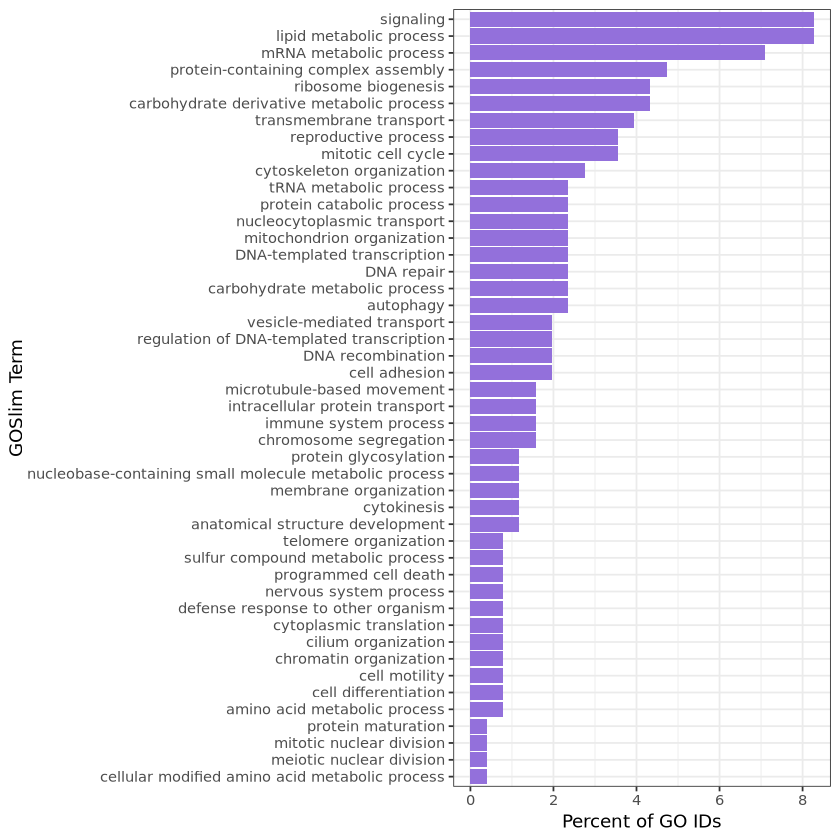

In [64]:
ggplot(slimdf %>% 
         filter(Percent > 0) %>% # remove those without any matching GO IDs
         arrange(desc(Percent)), # order by most to least
       aes(x=reorder(Term, Percent), y=Percent)) +
  geom_col(fill = 'mediumpurple') +
  labs(x="GOSlim Term", y="Percent of GO IDs") +
coord_flip() + 
  theme_bw()

what if I just take my list of significant DMG and match them to GOSlim terms? 

In [67]:
head(gene2GOslim)

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
1,GO:0000012,GO:0006281,DNA repair,LOC111111868
2,GO:0000012,GO:0006281,DNA repair,LOC111128425
3,GO:0000012,GO:0006281,DNA repair,LOC111135198
4,GO:0000012,GO:0006281,DNA repair,LOC111111498
5,GO:0000012,GO:0006281,DNA repair,LOC111128516
6,GO:0000012,GO:0006281,DNA repair,LOC111136704


In [74]:
# list of sig. DMG from CH vs. HC
sigCH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/sig_DMGs/sig_CH_HC_genes.csv')
sigCH <- sigCH[,2]

length(sigCH)
head(sigCH)

[1] 193

[1] "LOC111099548" "LOC111099571" "LOC111099585" "LOC111099930" "LOC111099978"
[6] "LOC111100608"

In [75]:
CH_goSlim <- gene2GOslim[sigCH %in% gene2GOslim$gene_id,]
head(CH_goSlim)

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
19,GO:0000027,GO:0042254;GO:0065003,ribosome biogenesis;protein-containing complex assembly,LOC111137006
45,GO:0000045,GO:0006914,autophagy,LOC111131738
60,GO:0000045,GO:0006914,autophagy,LOC111127879
81,GO:0000054,GO:0006913;GO:0042254,nucleocytoplasmic transport;ribosome biogenesis,LOC111125671
82,GO:0000054,GO:0006913;GO:0042254,nucleocytoplasmic transport;ribosome biogenesis,LOC111135936
94,GO:0000055,GO:0006913;GO:0042254,nucleocytoplasmic transport;ribosome biogenesis,LOC111122535


In [86]:
flat.CH_goSlim <- CH_goSlim %>% separate_rows(!!sym('GOslim'), sep = ";")

flat.CH_goSlim <- flat.CH_goSlim %>% separate_rows(!!sym('Term'), sep = ";") 
head(flat.CH_goSlim)

GO.IDs,GOslim,Term,gene_id
<chr>,<chr>,<chr>,<chr>
GO:0000027,GO:0042254,ribosome biogenesis,LOC111137006
GO:0000027,GO:0042254,protein-containing complex assembly,LOC111137006
GO:0000027,GO:0065003,ribosome biogenesis,LOC111137006
GO:0000027,GO:0065003,protein-containing complex assembly,LOC111137006
GO:0000045,GO:0006914,autophagy,LOC111131738
GO:0000045,GO:0006914,autophagy,LOC111127879


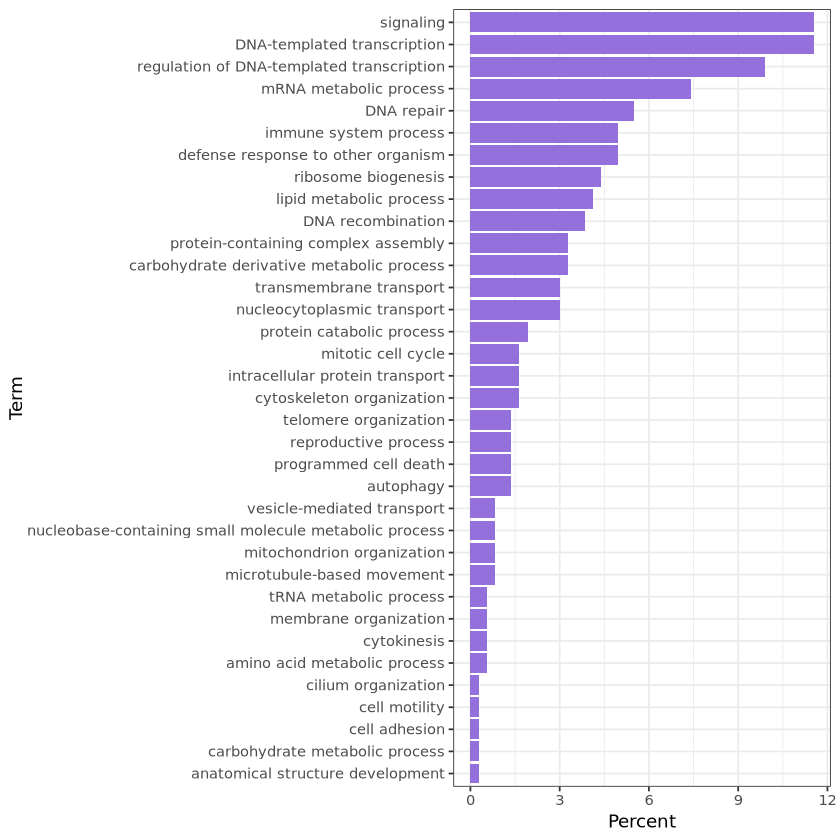

In [94]:
CH_goSlim_DMG <- flat.CH_goSlim %>% 
  count(Term, sort = TRUE) %>% 
  mutate(Percent = n / sum(n) * 100) %>% 
  ggplot(aes(x=reorder(Term, Percent), y=Percent)) +
  geom_col(fill = 'mediumpurple') +
  labs(x="Term", y="Percent") +
  theme_bw() +
coord_flip()

CH_goSlim_DMG

so this is looking at *only* sig. DMG instead of all of the genes.... not sure which way is correct

## HH vs. HC

In [88]:
# list of sig. DMG from CH vs. HC
sigHH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/sig_DMGs/sig_HH_HC_genes.csv')
sigHH <- sigHH[,2]

length(sigHH)
head(sigHH)

[1] 76

[1] "LOC111099548" "LOC111099571" "LOC111099930" "LOC111100608" "LOC111101237"
[6] "LOC111101984"

In [89]:
HH_goSlim <- gene2GOslim[sigHH %in% gene2GOslim$gene_id,]
head(HH_goSlim)

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
14,GO:0000027,GO:0042254;GO:0065003,ribosome biogenesis;protein-containing complex assembly,LOC111120109
31,GO:0000028,GO:0042254;GO:0065003,ribosome biogenesis;protein-containing complex assembly,LOC111120557
34,GO:0000028,GO:0042254;GO:0065003,ribosome biogenesis;protein-containing complex assembly,LOC111126883
59,GO:0000045,GO:0006914,autophagy,LOC111131691
70,GO:0000045,GO:0006914,autophagy,LOC111137481
90,GO:0000055,GO:0006913;GO:0042254,nucleocytoplasmic transport;ribosome biogenesis,LOC111129825


In [90]:
flat.HH_goSlim <- HH_goSlim %>% separate_rows(!!sym('GOslim'), sep = ";")

flat.HH_goSlim <- flat.HH_goSlim %>% separate_rows(!!sym('Term'), sep = ";") 
head(flat.HH_goSlim)

GO.IDs,GOslim,Term,gene_id
<chr>,<chr>,<chr>,<chr>
GO:0000027,GO:0042254,ribosome biogenesis,LOC111120109
GO:0000027,GO:0042254,protein-containing complex assembly,LOC111120109
GO:0000027,GO:0065003,ribosome biogenesis,LOC111120109
GO:0000027,GO:0065003,protein-containing complex assembly,LOC111120109
GO:0000028,GO:0042254,ribosome biogenesis,LOC111120557
GO:0000028,GO:0042254,protein-containing complex assembly,LOC111120557


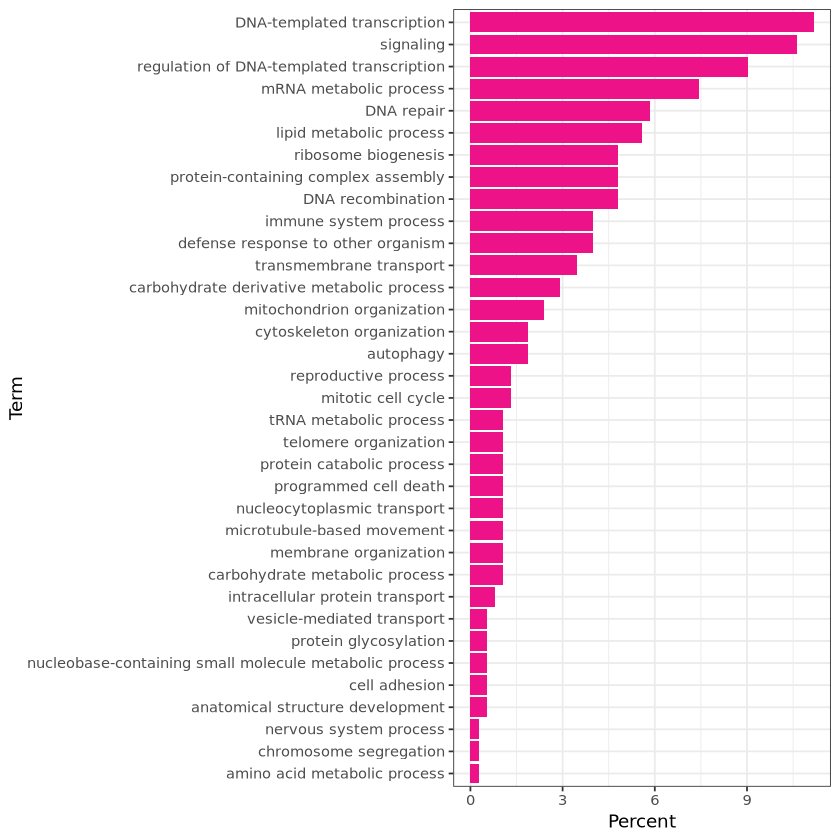

In [92]:
HH_goSlim_DMG <- flat.HH_goSlim %>% 
  count(Term, sort = TRUE) %>% 
  mutate(Percent = n / sum(n) * 100) %>% 
  ggplot(aes(x=reorder(Term, Percent), y=Percent)) +
  geom_col(fill = 'deeppink2') +
  labs(x="Term", y="Percent") +
  theme_bw() +
coord_flip()

HH_goSlim_DMG

## CC vs. HC

In [106]:
CCmwu <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/DMGs_analysis/go_mwu/BP_allGenes_CC_lfc.csv', sep = '\t')
head(CCmwu)

,name,term,lev,seq,value
,<chr>,<chr>,<int>,<chr>,<dbl>
1,small molecule biosynthetic process,GO:0044283,2,LOC111100410,0.388846817
2,small molecule biosynthetic process,GO:0044283,2,LOC111104439,-0.193034443
3,small molecule biosynthetic process,GO:0044283,2,LOC111104443,-0.063696703
4,small molecule biosynthetic process,GO:0044283,2,LOC111108042,0.038312953
5,small molecule biosynthetic process,GO:0044283,2,LOC111112404,0.085243036
6,small molecule biosynthetic process,GO:0044283,2,LOC111113806,0.008974317


In [95]:
# list of sig. DMG from CH vs. HC
sigCC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/sig_DMGs/sig_CC_HC_genes.csv')
sigCC <- sigCC[,2]

length(sigCC)
head(sigCC)

[1] 12

[1] "LOC111103344" "LOC111115023" "LOC111117745" "LOC111117760" "LOC111118022"
[6] "LOC111119327"

In [90]:
flat.HH_goSlim <- HH_goSlim %>% separate_rows(!!sym('GOslim'), sep = ";")

flat.HH_goSlim <- flat.HH_goSlim %>% separate_rows(!!sym('Term'), sep = ";") 
head(flat.HH_goSlim)

GO.IDs,GOslim,Term,gene_id
<chr>,<chr>,<chr>,<chr>
GO:0000027,GO:0042254,ribosome biogenesis,LOC111120109
GO:0000027,GO:0042254,protein-containing complex assembly,LOC111120109
GO:0000027,GO:0065003,ribosome biogenesis,LOC111120109
GO:0000027,GO:0065003,protein-containing complex assembly,LOC111120109
GO:0000028,GO:0042254,ribosome biogenesis,LOC111120557
GO:0000028,GO:0042254,protein-containing complex assembly,LOC111120557


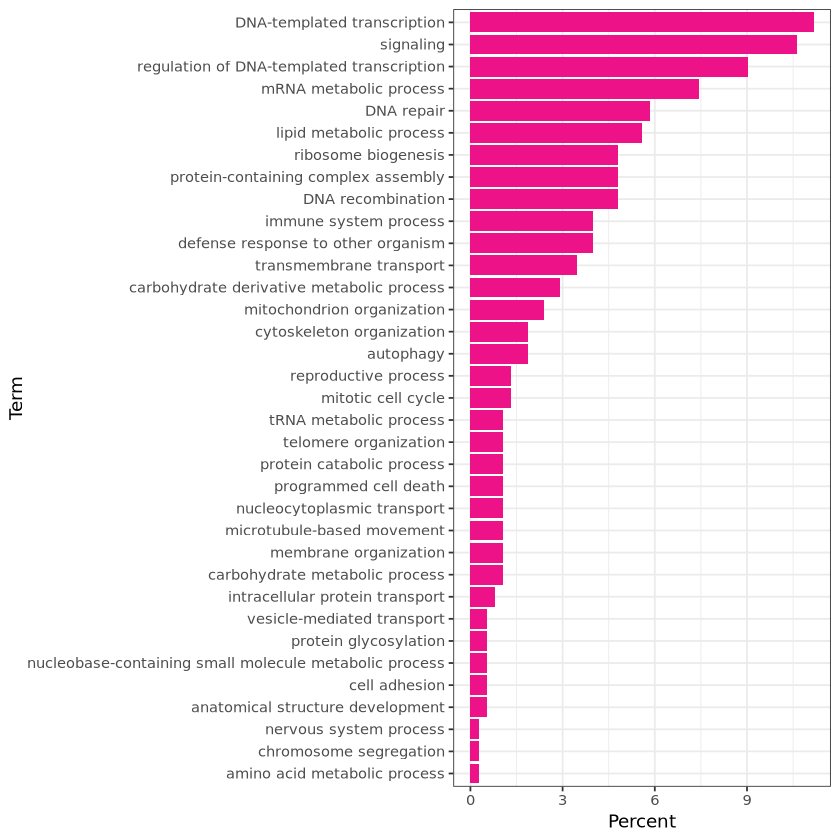

In [92]:
HH_goSlim_DMG <- flat.HH_goSlim %>% 
  count(Term, sort = TRUE) %>% 
  mutate(Percent = n / sum(n) * 100) %>% 
  ggplot(aes(x=reorder(Term, Percent), y=Percent)) +
  geom_col(fill = 'deeppink2') +
  labs(x="Term", y="Percent") +
  theme_bw() +
coord_flip()

HH_goSlim_DMG